Project Title: Detection of Parkinson's Disease

In [ ]:
#pip install scikit-learn==1.2.2

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Loading dataset

In [ ]:
#Link to dataset: https://archive.ics.uci.edu/dataset/174/parkinsons
df=pd.read_csv("dataset.csv")

In [ ]:
df.head()

,Unnamed: 0,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_percent,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,MDVP_APQ,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df.shape

(195, 24)

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.head()

,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_percent,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,MDVP_APQ,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


More information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MDVP_Fo_Hz           195 non-null    float64
 1   MDVP_Fhi_Hz          195 non-null    float64
 2   MDVP_Flo_Hz          195 non-null    float64
 3   MDVP_Jitter_percent  195 non-null    float64
 4   MDVP_Jitter_Abs      195 non-null    float64
 5   MDVP_RAP             195 non-null    float64
 6   MDVP_PPQ             195 non-null    float64
 7   Jitter_DDP           195 non-null    float64
 8   MDVP_Shimmer         195 non-null    float64
 9   MDVP_Shimmer_dB      195 non-null    float64
 10  Shimmer_APQ3         195 non-null    float64
 11  Shimmer_APQ5         195 non-null    float64
 12  MDVP_APQ             195 non-null    float64
 13  Shimmer_DDA          195 non-null    float64
 14  NHR                  195 non-null    float64
 15  HNR                  195 non-null    flo

In [ ]:
df.describe()

,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_percent,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,MDVP_APQ,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Check for missing values

In [ ]:
df.isnull().sum()

,0
MDVP_Fo_Hz,0
MDVP_Fhi_Hz,0
MDVP_Flo_Hz,0
MDVP_Jitter_percent,0
MDVP_Jitter_Abs,0
MDVP_RAP,0
MDVP_PPQ,0
Jitter_DDP,0
MDVP_Shimmer,0
MDVP_Shimmer_dB,0


Labels for Status
1. {1: Person has disease}
2. {0: Person is absolutely healthy}

In [ ]:
df["status"].value_counts()

,count
status,
1,147
0,48


Data visualisation

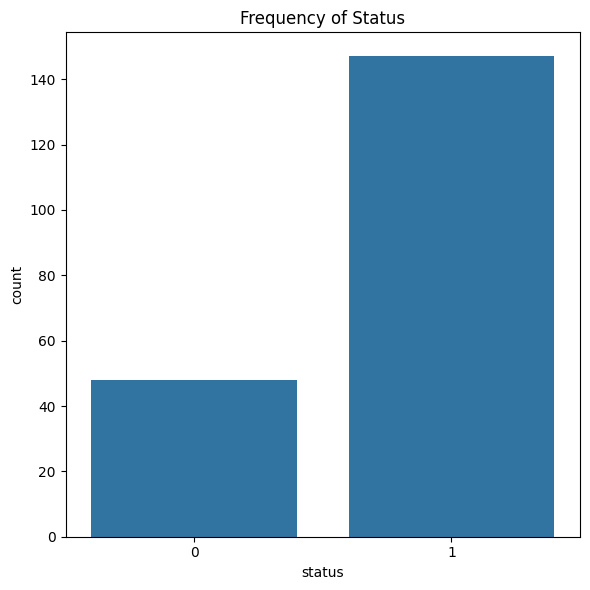

In [ ]:
#Countplot for status
plt.figure(figsize=(6,6))
sns.countplot(data=df, x="status")
plt.title("Frequency of Status")
plt.tight_layout()
plt.show()

Training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop(["status"], axis=1)
y=df["status"]

In [ ]:
X.head()

,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_percent,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,MDVP_APQ,Shimmer_DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
y.head()

,status
0,1
1,1
2,1
3,1
4,1


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=42)

Data standardization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#mmc
mmc=MinMaxScaler(feature_range = (0,1))

In [ ]:
X_train_trans=mmc.fit_transform(X_train)
X_test_trans=mmc.transform(X_test)

XGB Classifier

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb=XGBClassifier(use_label_encoder=False)

In [ ]:
#Model
model=xgb.fit(X_train_trans, y_train)

In [ ]:
model

In [ ]:
y_pred=xgb.predict(X_test_trans)

In [ ]:
y_pred

Accuracy score

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
score=accuracy_score(y_test, y_pred)
print("Accuracy %=",(score*100))

Classification report

In [ ]:
print(classification_report(y_test,y_pred))

Confusion matrix

In [ ]:
matrix=confusion_matrix(y_test, y_pred)

In [ ]:
matrix

Heatmap

In [ ]:
sns.heatmap(data=matrix, annot=True, fmt='g')
plt.title("XGB Classifier")
plt.show()

Model testing

In [ ]:
test_input_1=pd.DataFrame([[119.992, 157.302, 74.997, 0.00784, 0.00007, 0.00370, 0.00554,
                          0.01109, 0.04374, 0.426, 0.02182, 0.03130, 0.02971, 0.06545,
                          0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482, 2.301442, 0.284654]],
                        columns=["MDVP_Fo_Hz", "MDVP_Fhi_Hz", "MDVP_Flo_Hz", "MDVP_Jitter_percent)", "MDVP_Jitter_Abs",
                                 "MDVP_RAP", "MDVP_PPQ", "Jitter_DDP", "MDVP_Shimmer", "MDVP_Shimmer_dB", "Shimmer_APQ3",
                                 "Shimmer_APQ5", "MDVP_APQ", "Shimmer_DDA", "NHR", "HNR", "RPDE", "DFA", "spread1", "spread2",
                                 "D2", "PPE"])

In [ ]:
xgb.predict(test_input_1)

In [ ]:
test_input_2=pd.DataFrame([[129.992, 167.302, 75.997, 0.00984, 0.00007, 0.00370, 0.00554,
                          0.01209, 0.05, 0.4, 0.02182, 0.03130, 0.02971, 0.06545,
                          0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482, 3.301442, 0.284]],
                        columns=["MDVP_Fo_Hz", "MDVP_Fhi_Hz", "MDVP_Flo_Hz", "MDVP_Jitter_percent)", "MDVP_Jitter_Abs",
                                 "MDVP_RAP", "MDVP_PPQ", "Jitter_DDP", "MDVP_Shimmer", "MDVP_Shimmer_dB", "Shimmer_APQ3",
                                 "Shimmer_APQ5", "MDVP_APQ", "Shimmer_DDA", "NHR", "HNR", "RPDE", "DFA", "spread1", "spread2",
                                 "D2", "PPE"])

In [ ]:
xgb.predict(test_input_2)

Import pickle

In [ ]:
import pickle
with open("Model_Prediction.sav", "wb") as f:
    pickle.dump(model,f)


In [ ]:
with open("MinMaxScaler.sav", "wb") as f:
    pickle.dump(mmc,f)